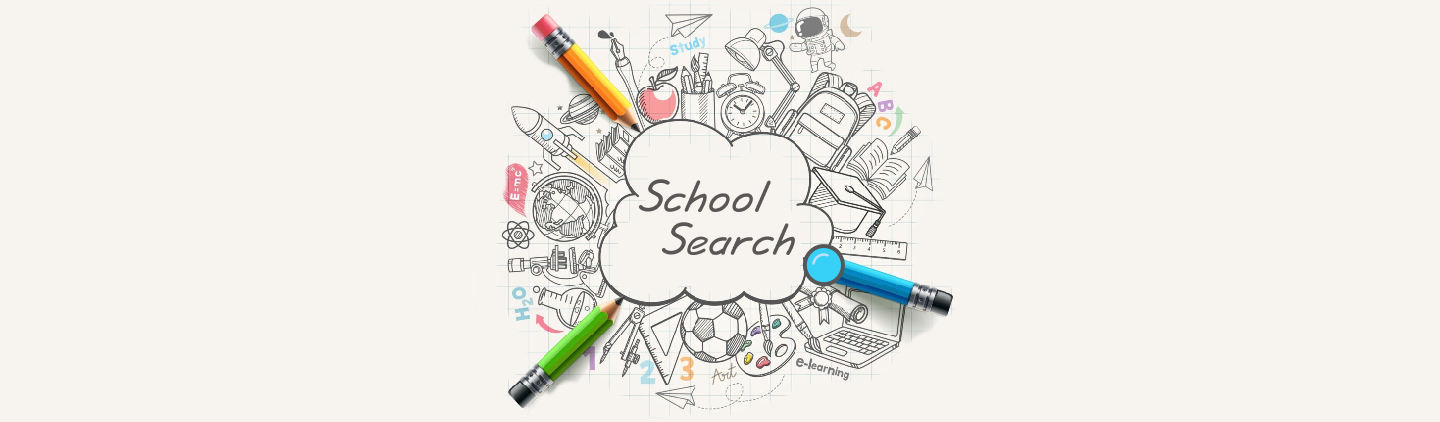

# Introduction
This is a personal project by myself Irene Oriarewo. It aims to reduce the daunting task of school search for students by using Selenium to automate searches from MastersPortal's Websiite. The official website page can be gotten [here](https://www.mastersportal.com/).

The results from the school search would be sent to the user either though Whatsapp or Email depnding on user's choice.

## Aim
1. Ease in school search process
2. Automate notifications by users choice either through whatsapp or email.

## Guide 🚨
The following steps should taken for the code to run effectively.
1. Install all required packages before running the entire code.
2. Ensure you have a stable internet connection.
3. Install chrome web driver and change the file path within the code.
4. For the Whatsapp option, ensure you are logged in on your default web browser and then edit the recievers number.
5. For the Email option, change the email and password.


## Process
### Loading packages

These packages would the used throughout the code and should be installed before running.

In [ ]:
#loading the required packages
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from time import sleep
import pyshorteners
import pywhatkit
from datetime import datetime
from tkinter import *
import tkinter as tk
from tkinter import ttk
from my_data import *
import smtplib
from email.message import EmailMessage
from tkinter import messagebox

The documentation of the main packages can be found below:
1. [Selenium](https://www.selenium.dev/documentation/)

2. [Time](https://docs.python.org/3/library/time.html)

3. [Pyshortners](https://docs.python.org/3/library/time.html)

4. [Pywhatkit](https://pypi.org/project/pywhatkit/)

5. [Datetime](https://docs.python.org/3/library/datetime.html)

6. [Smtplib](https://docs.python.org/3/library/smtplib.html)

7. [Tkinter](https://docs.python.org/3/library/tk.html)

8. [Datetime](https://pypi.org/project/DateTime/)


In [ ]:
edited_val = ''
url = ''
val = ''
type_tiny = pyshorteners.Shortener()
global window

The **type_tiny** variable is used to shorten the url

In [ ]:
password = 'PASSWORD'
my_email = "EXAMPLE@gmail.com"

Replace the email and password variable with your details.

## Our GUI
A simple and easy to use interface was created to improve user experience.


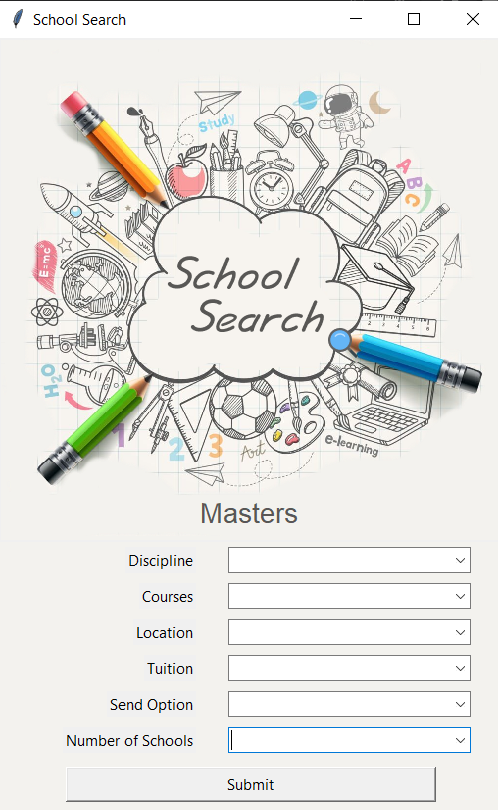

## Def functions
These functions were created to run a group of related statements that perform a specific task. Various def functions were created thoughout this project.

In [ ]:
# to get and clean input in the courses combobox
def getSelection(event):
    global val, url, edited_val
    val = event.widget.get()
    edited_val = val.replace(' & ', '-').replace(' and ', '-').replace(' ', '-').split(' (')[0].lower().replace(',', '')

The **getSelection** function was created specifically to get the input from the courses_textbox and clean the data and save the input to a new variable called edited_val.

The **global** function was also called so the variables can be used outside of the def function.

In [ ]:
# URL creation
def getUrl(event):
    global edited_val, url

    url = f'https://www.mastersportal.com/search/master/{edited_val}/{location_box.get().lower()}'

The **getUrl** function is used to create the first webpage url where all the list of school information would be gotten from.
**Edited val** would give the course title and the location box gives the location.

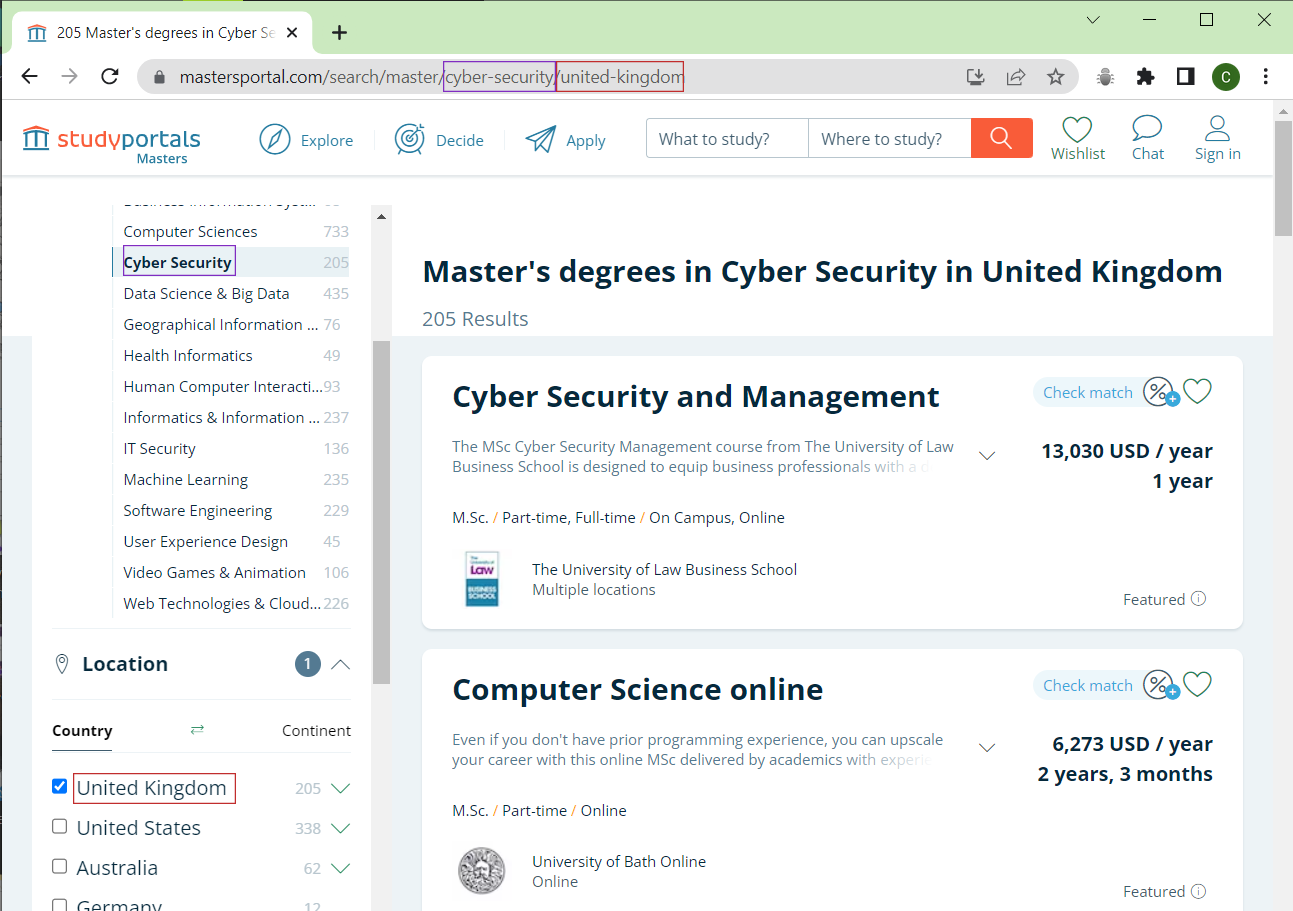

In [ ]:
# to get the courses combobox
def my_upd(*args):
    global course_box, dis, url
    for w in window.grid_slaves(1):
        pass
        # w.grid_remove()
        if (discipline_box.get() in discipline):
            word = discipline_box.get()

            index = discipline.index(word)
             # course create
            course_label = tk.Label(text="Courses")
            course_label.grid(column=0, row=2, sticky='e', pady=5)
            dis = tk.StringVar()
            my_options = expanded_list[index]
            course_box = ttk.Combobox(window, values=my_options, width=27, textvariable=dis, )
            course_box.grid(column=1, row=2)

            course_box.current()
            course_box.bind('<<ComboboxSelected>>', getSelection)

On initiation of the code, the courses combobox would be hidden. When the discipline is chosen, a combobox with the respective available courses would be displayed. 
The course_box is bound to the getSelection function.

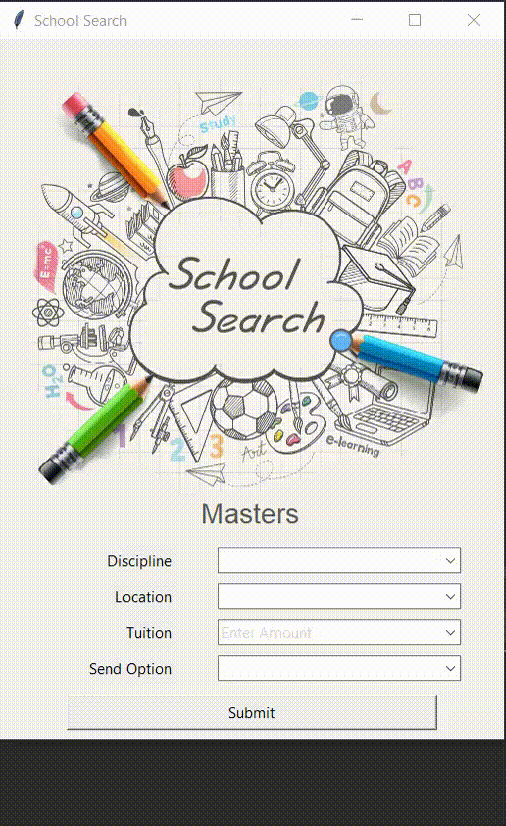

In [ ]:
# delete temporary text
def temp_text(e):
   tuition_textbox.delete(0,"end")
   tuition_textbox.config(foreground='black')

The **temp_text** function is used to remove the temporary text 'Enter Amount' in tuition box.

In [ ]:
# message sending option
def sendOptions(ORGANISATION_NAME, STUDY_TITLES,TUITION_FEE,APPLY_DATE, SCHOOL_LINK):
    message = f'Hey, \n\nSchool Name: {ORGANISATION_NAME}\n\nCourse Title: {STUDY_TITLES}\n\nApplication Date: {APPLY_DATE}\n\nTuition Fee: {TUITION_FEE}\n\nSchool Link: {SCHOOL_LINK}\n\nGoodluck applying 👍'

    if send_option_box.get() == 'Whatsapp':
        now_hour = int(datetime.now().strftime('%H'))
        now_min = int(datetime.now().strftime('%M'))

        driver.quit()
        pywhatkit.sendwhatmsg("123456789", message, now_hour, now_min + 1)

    if send_option_box.get().lower() == 'email':
        import smtplib
        from email.message import EmailMessage


        email_address = my_email
        email_password = password

        # create email
        msg = EmailMessage()
        msg['Subject'] = "Available school application"
        msg['From'] = email_address
        msg['To'] =email_address
        msg.set_content(f"{message}")

        # send email
        with smtplib.SMTP_SSL('smtp.gmail.com', 465) as smtp:
            smtp.login(email_address, email_password)
            smtp.send_message(msg)
            print('Email sent')

The **sendOptions** function is used to send out the output of the search which could be either through email or whatapp.
##### Whatsapp Output
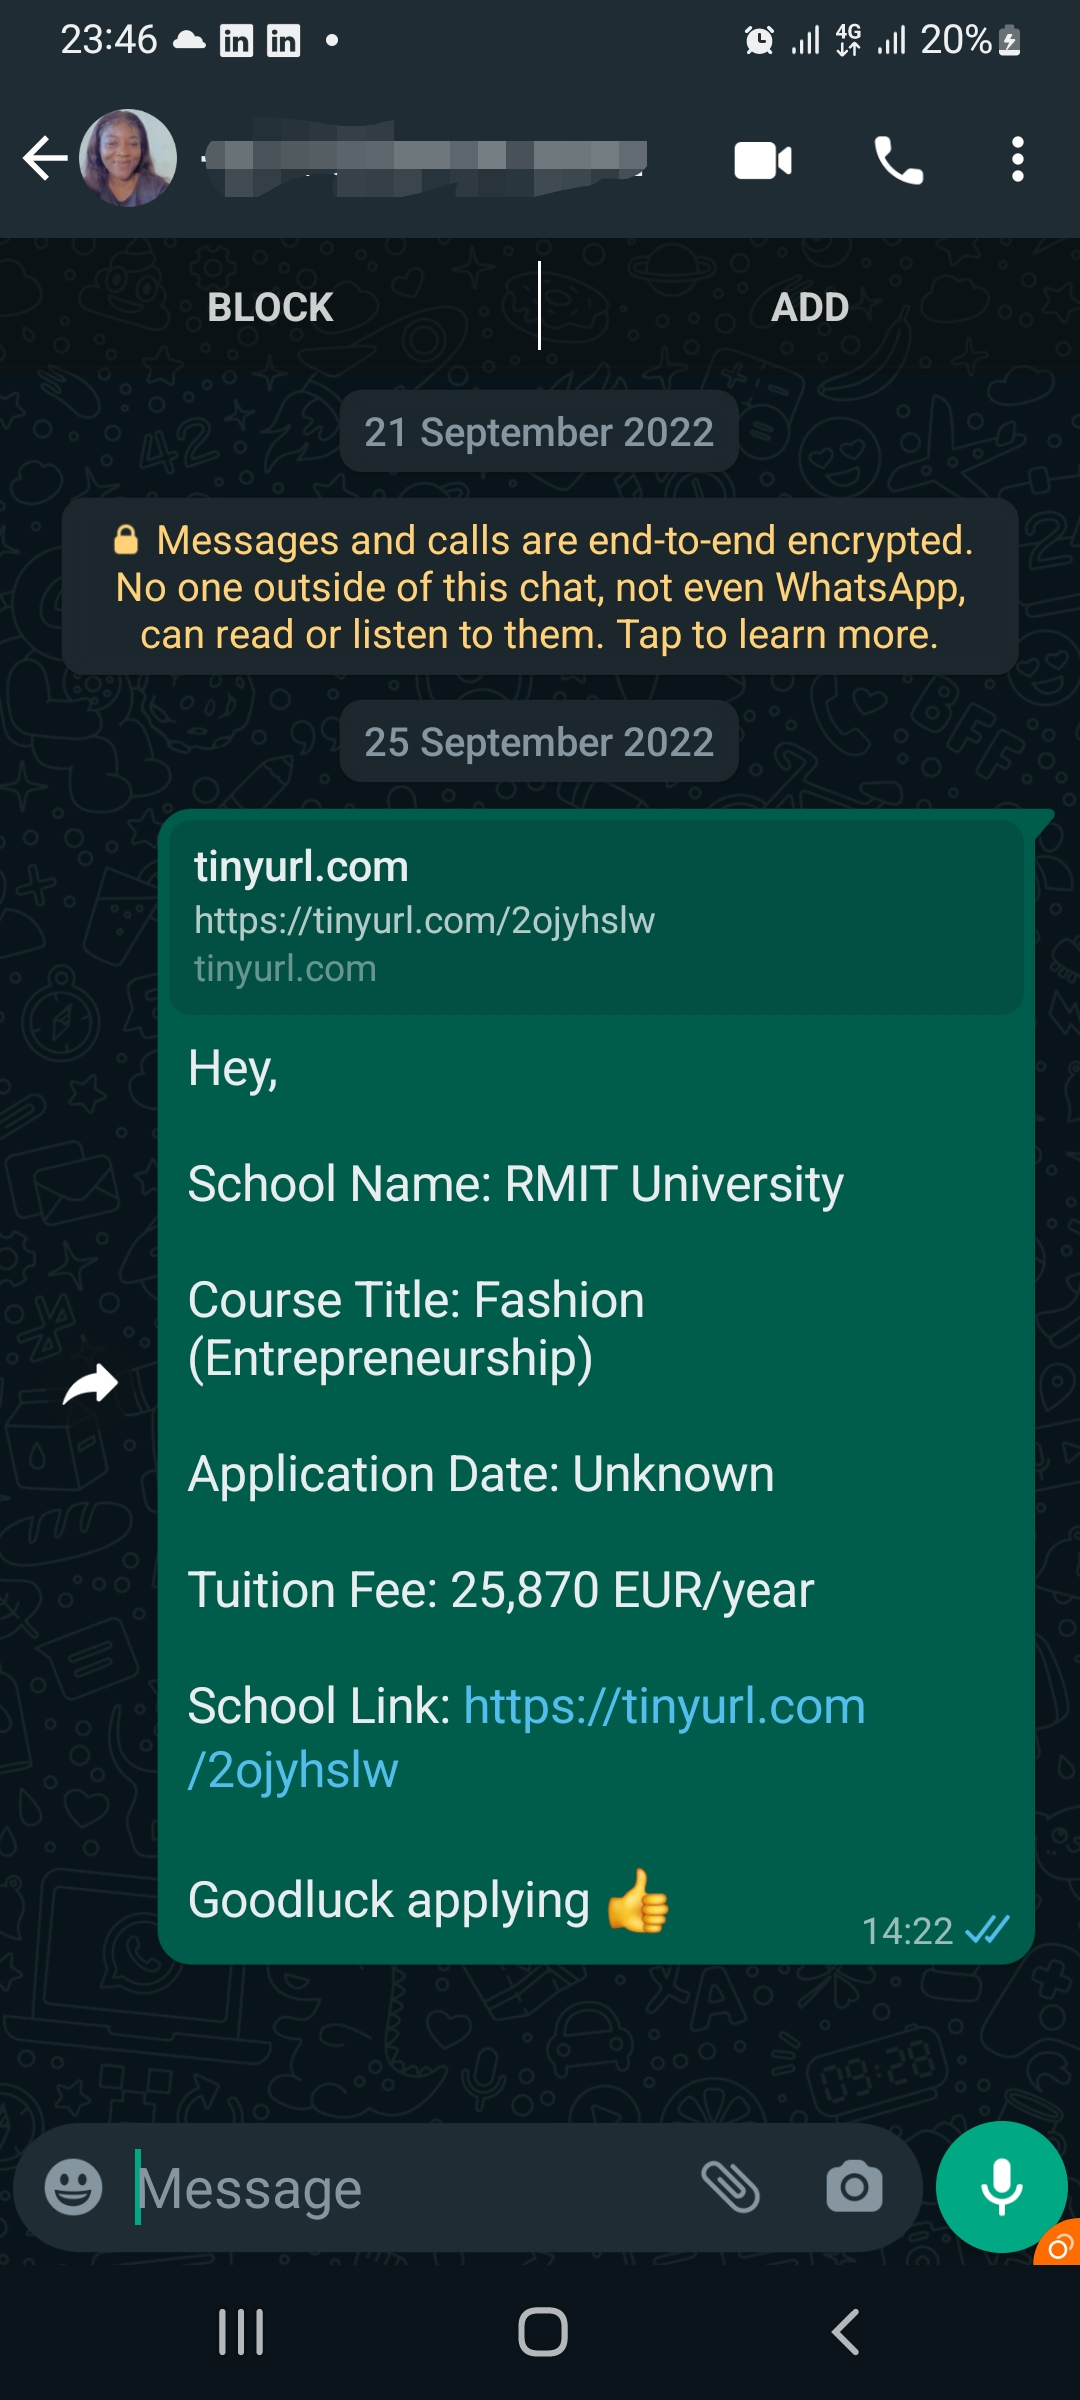


##### Email Output
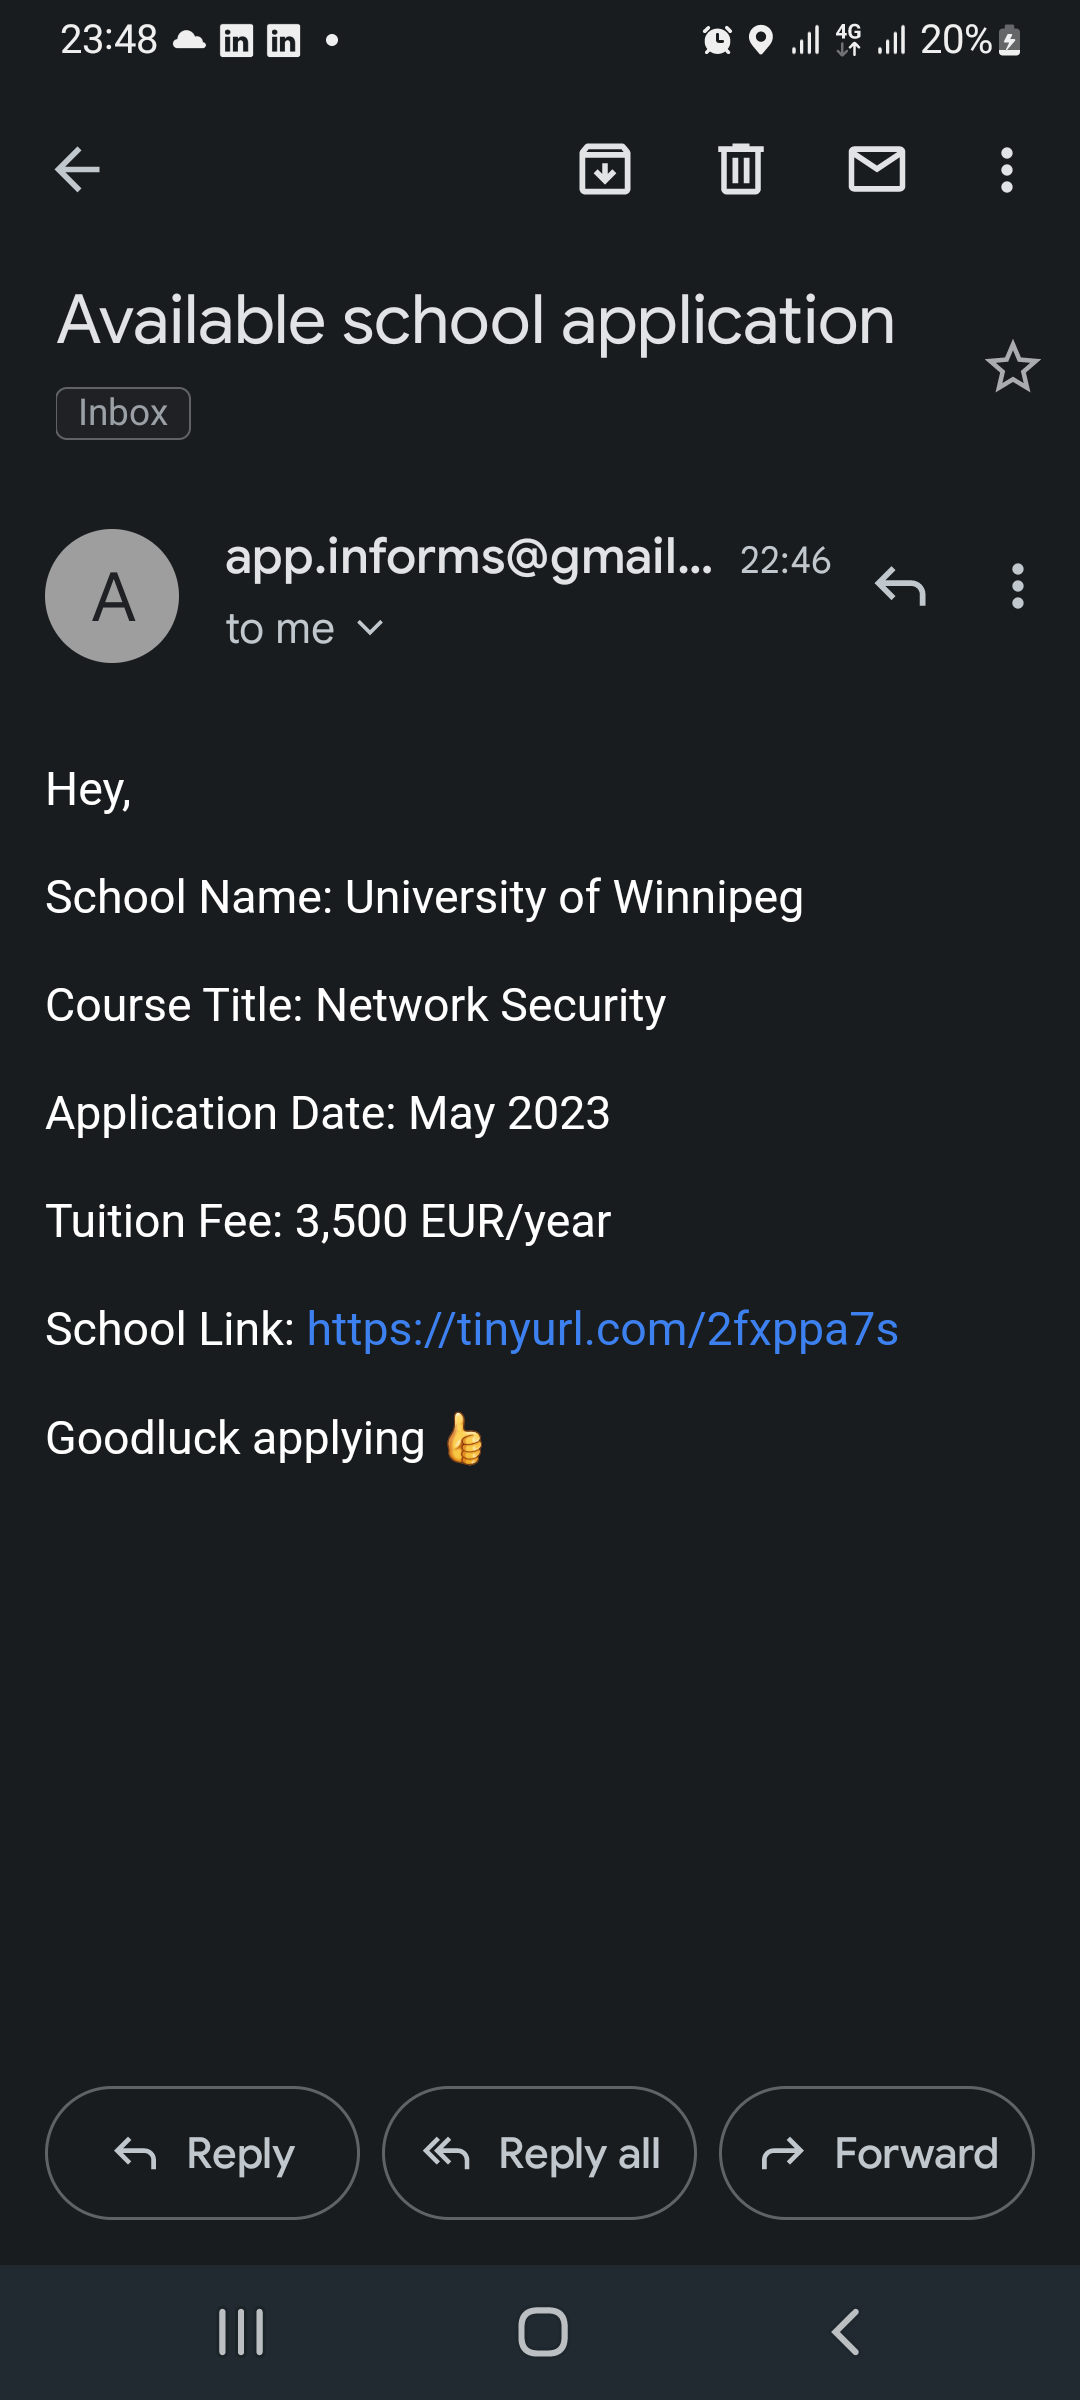


In [ ]:
def num_school_available():
    if int(num_school_textbox.get()) > len(code):
        messagebox.showinfo(title="Error", message=f"{len(code)} schools available in this catagory.")
        window.destroy()
        window = TK
        window.mainloop()


The **num_school_available** function was created to get the available number of schools gotten from the search and compare with the users input.If user input exceeds available schools then a message box appears notifying the user the maximum number if school available in that category.

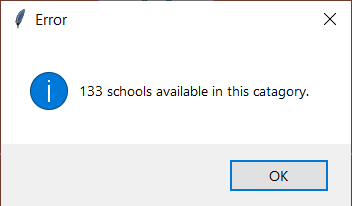

*************************************************

In [ ]:
def get_school_information():
    sleep(10)
    global course_titles, code
    study_name = driver.find_elements(By.CLASS_NAME, "StudyName")
    course_titles = [n.text.lower().replace(" ", "-").split("(")[0] for n in study_name]
    print(len(course_titles))

    tracking_num = driver.find_elements(By.CLASS_NAME, 'TrackingEvent')
    code = [n.get_attribute('data-id') for n in tracking_num]
    num_school_available()

**get_school_information** function is used to find all available courses and their track number which would be used to create the url for each school

In [ ]:
def look():
    global url
    print(url)
    global driver

    if not driver:
        #individual school properties
        chrome_driver_path = "C:/Users/Admin/PAT"
        s = Service(chrome_driver_path)

        #scrolling down the page to load more schools
        driver = webdriver.Chrome(service=s)
        driver.get(url)
        driver.maximize_window()
        for _ in range(10):
            driver.execute_script("window.scrollBy(0, document.body.scrollHeight);")
            sleep(2)


        get_school_information()
        driver.quit()
        b = 0
        loop = True
        url_no = 0
        while loop is True:
            driver.quit()
            url = f"https://mastersportal.com/studies/{code[url_no]}/{course_titles[url_no]}.html?ref=search_card"
            url_no += 1
            driver = webdriver.Chrome(service=s)
            driver.get(url)


            ORGANISATION_NAME = driver.find_element(By.CLASS_NAME, "OrganisationName").text
            STUDY_TITLES = driver.find_element(By.CLASS_NAME, "StudyTitle").text
            TUITION_FEE = driver.find_element(By.CLASS_NAME, "TuitionFeeContainer").text
            APPLY_DATE = driver.find_element(By.CLASS_NAME, "TimingContainer").text
            SCHOOL_LONG_LINK = driver.find_element(By.CLASS_NAME, "ChampionButton").get_attribute('href')
            SCHOOL_LINK = type_tiny.tinyurl.short(SCHOOL_LONG_LINK)

            if APPLY_DATE == "":
                APPLY_DATE = 'Unknown'
            try:
                if int(tuition_textbox.get()) > int(TUITION_FEE.split(' ')[0].replace(',', '')) or int(tuition_textbox.get()) == '':
                    b += 1
                    sendOptions(ORGANISATION_NAME, STUDY_TITLES,TUITION_FEE,APPLY_DATE, SCHOOL_LINK)
            except ValueError:
                pass
            if b == int(num_school_textbox.get()):
                loop = False


## Interface Creation
With the use of Tkinter a grapical user interface (GUI) is created. 
Entry's, Labels, Comboboxes and Buttons are used to improve the user experince and optimise search.

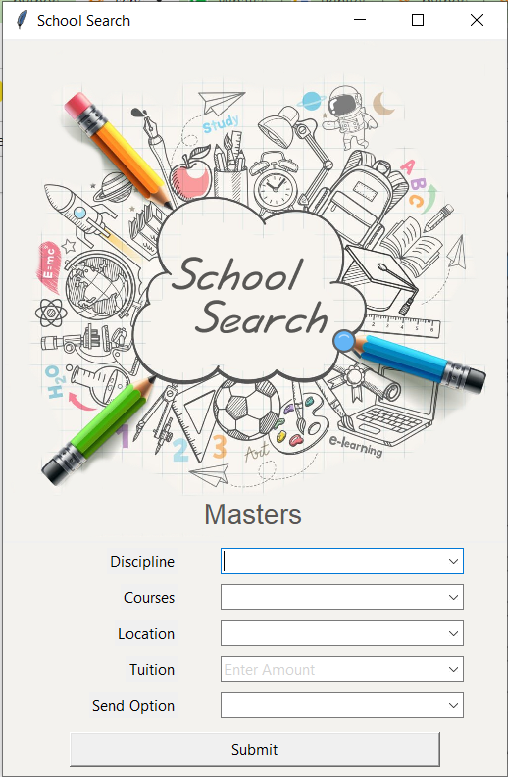

Tkinter window creation

In [ ]:
window = Tk()
window.title("School Search")

window.minsize(width=500, height=700)
window.config(bg='#F3F2EE')

# logo area
canvas = Canvas(width=500, height=500, bg='#F3F2EE', )

logo_img = PhotoImage(file="school.png")
canvas.create_image(250, 250, image=logo_img,)
canvas.create_text(250,475, text='Masters', font=('MingLiU_HKSCS', '17', 'normal'), fill='#585755')
canvas.grid(column=0, row=0, columnspan=2)

# discipline area
discipline_label = Label(text="Discipline")
discipline_label.grid(column=0, row=1,sticky='e', pady=5)
sel = StringVar()
my_options = discipline
discipline_box = ttk.Combobox(window, values=my_options, width=27,
                              textvariable=sel, ) # Combobox
discipline_box.grid(row=1, column=1, columnspan=3)
discipline_box.current()

# location area

location_label = Label(text="Location")
location_label.grid(column=0, row=4,sticky='e', pady=5)
loc = StringVar()
location_box = ttk.Combobox(window, width=27, textvariable=loc)

location_box['values'] =('United-Kingdom',
                            'United-States',
                            'Australia',
                            'Germany',
                            'Canada',)

location_box.grid(column=1, row=4)
location_box.current()
location_box.bind('<<ComboboxSelected>>', getUrl)

# tuition area
tuition_label = Label(text="Tuition")
tuition_label.grid(column=0, row=5,sticky='e', pady=5)

tuition_textbox = ttk.Combobox(window,  width=27,foreground='#D3D3D3' )
tuition_textbox.insert(0, "Enter Amount")
tuition_textbox.bind("<FocusIn>", temp_text)
tuition_textbox.grid(column=1, row=5, )

# sending option
send_option_label = Label(text="Send Option")
send_option_label.grid(column=0, row=6, sticky='e', pady=5)
a = StringVar()
send_option_box = ttk.Combobox(window, width=27, textvariable=a)

send_option_box['values'] = ('Whatsapp',
                          'Email',)

send_option_box.grid(column=1, row=6)
send_option_box.current()

# number of schools to be sent
num_school_label = Label(text="Number of Schools")
num_school_label.grid(column=0, row=7,sticky='e', pady=5)

num_school_textbox = ttk.Combobox(window,  width=27 )
num_school_textbox.grid(column=1, row=7, )

#submit button
add_button = Button(text="Submit", width=45 , command=look)
add_button.grid(column=0, row=8, columnspan=2, pady=9)

driver = None

sel.trace('w',my_upd)


window.mainloop()

## Comments
Suggestions are welcomed 😊.